# Exploratory Data Analysis on Haberman's dataset

Exploratory data analysis is done with the help of statistics and visualization techniques on the given dataset.
Here, Haberman's dataset is related to survival of patients who undergone surgery for breast cancer disease. 

The aim of this EDA over the given dataset is to find out any trend if possible for the survival of the patient who undergone the breast cancer surgery.

In [1]:
# importing  the required tools for EDA.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''First we load the Haberman dataset into the dataframe'''
#Load Haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

# Displaying the loaded dataset.
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [2]:
# Checking the data shape and available columns...

print("The shape of the Haberman dataset is", haberman.shape)
print('And the columns present in the dataset are: ',haberman.columns)
print('-----------------')
print(haberman.info())
print('-----------------')


The shape of the Haberman dataset is (306, 4)
And the columns present in the dataset are:  Index(['age', 'year', 'nodes', 'status'], dtype='object')
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
-----------------


 In the given dataset, the columns specifies as:
 
1. Age of the patient at the time of operation.
2. Year at which operation took place.
3. Number of positive nodes detected with patient.
4. Status of patient as 1= patient survived for 5 or more years, 2= patient died within 5 years.

And there are 306 rows of data present.

In [5]:
# Checking the count of survived and died patient :
print(haberman['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


Analysis:  
* The above result tells us that the dataset is imbalance in terms of statuses. 
* As more number of survied cases are given and less number of died cases are given.

In [6]:
# Lets check the age variation 
haberman["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


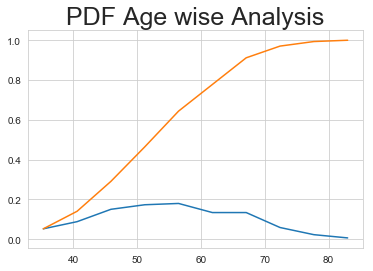

In [29]:
# Age wise analysis::

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF Age wise Analysis',size=25);
plt.show();

Analysis : 
* From above, we understood as the majority of patients given in dataset are in between age 45 to 65.


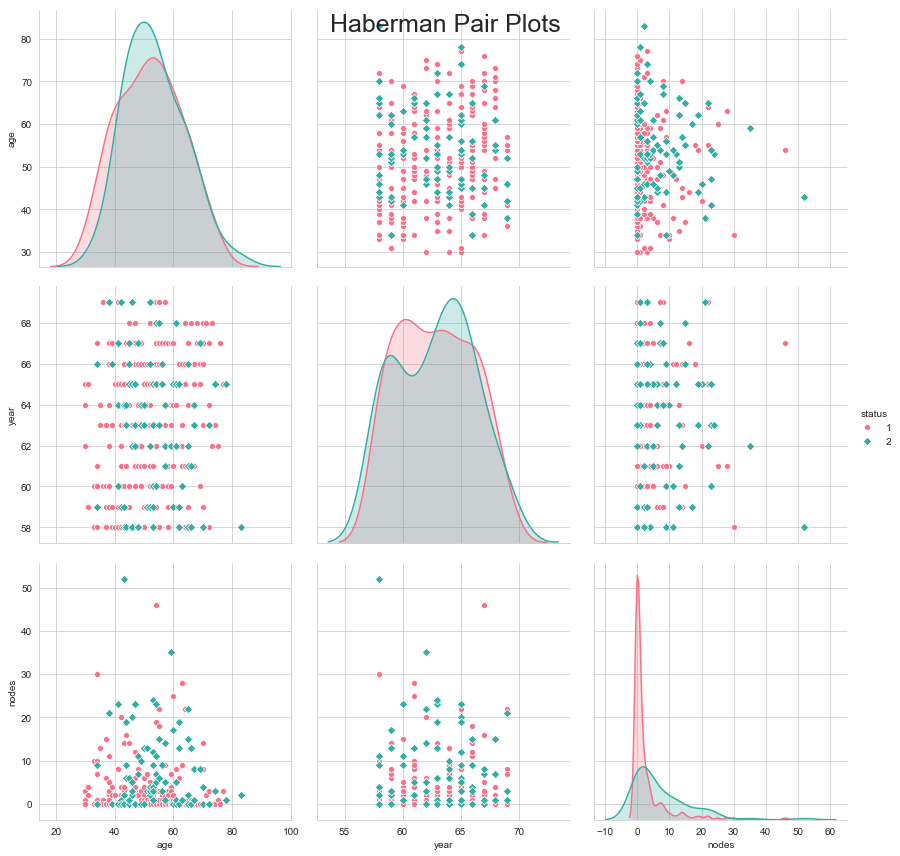

In [4]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=4,vars=["age","year","nodes"],markers=["o", "D"], palette="husl");
plt.suptitle('Haberman Pair Plots',size=25)
plt.show()

Using 2D scatter plot/pair plots we find out the relation between the variables present in the dataset.

Analysis:
* Most of the data points in 2 D pair plots seems to be overlaping. We cannot clearly distinguish them in two groups.
* Still node vs Age graph shows more survival probability when number of positive aux. nodes present is 0 or close to 0.

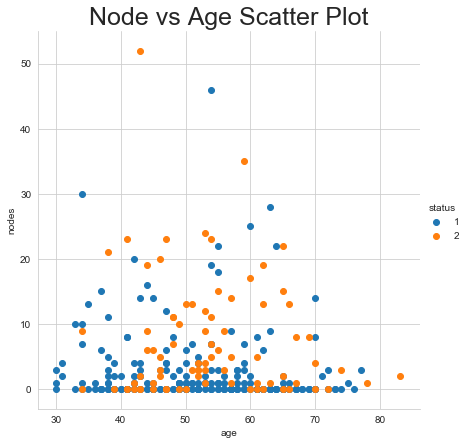

In [28]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=6).map(plt.scatter,'age','nodes').add_legend();
plt.title("Node vs Age Scatter Plot",size=25);
plt.show()

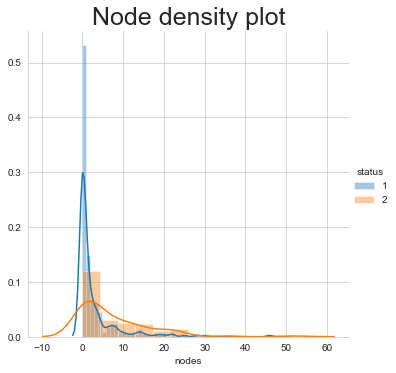

In [17]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Node density plot",size=25);
plt.show();

Analysis:
The above two graph verifies the conclusion as if number of nodes present are 0 or near , the chances of survival of patient is higher.

In [78]:

#Mean  
print(" Age Mean:")
print(np.mean(haberman["age"]))
print("\n Age Median:")
print(np.median(haberman["age"]))
print("\n Age Quantiles:")
print(np.percentile(haberman["age"],np.arange(0, 100, 25)))
print("\n90th Age Percentiles:")
print(np.percentile(haberman["age"],90))
print('In short we can describe our dataset as below:')
print(haberman.describe())

 Age Mean:
52.45751633986928

 Age Median:
52.0

 Age Quantiles:
[30.   44.   52.   60.75]

90th Age Percentiles:
67.0
In short we can describe our dataset as below:
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


Analysis:
* The above statistics tells us that 75% of patients are of age 60 or below and 90% of patients are below 67 years age.


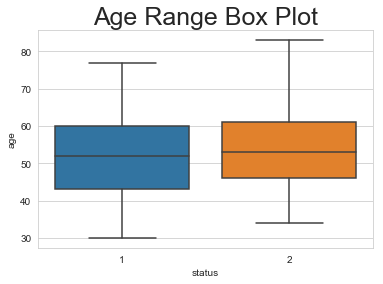

In [12]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Age Range Box Plot",size=25);
plt.show()

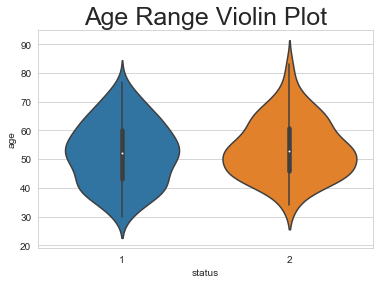

In [13]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title("Age Range Violin Plot",size=25);
plt.show()

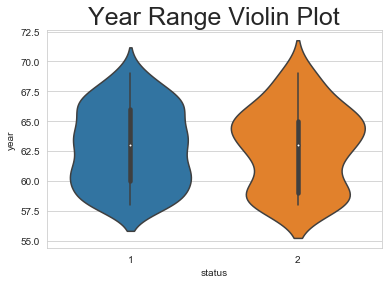

In [14]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.title("Year Range Violin Plot",size=25);
plt.show()

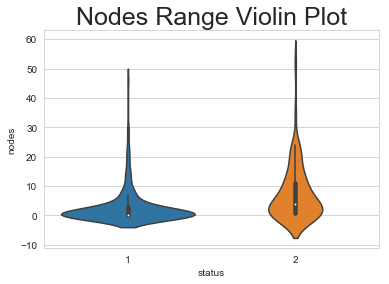

In [15]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Nodes Range Violin Plot",size=25);
plt.show()

Analysis: 
* The box plot and violin plot for age shows that, for patient at age 50 higher chances for non-survival and at age 52 more chances for survival.

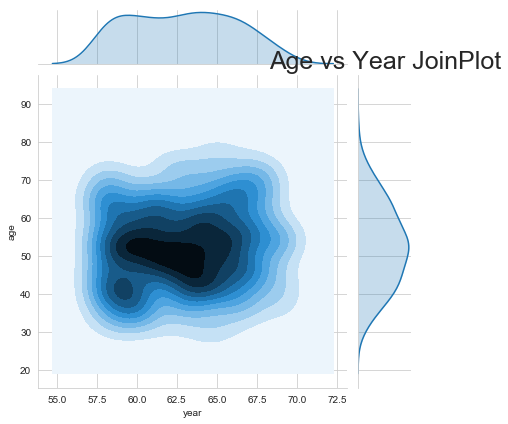

In [19]:
sns.jointplot(x="year", y="age", data=haberman, kind="kde");
plt.title("Age vs Year JoinPlot", size=25);
plt.show();

Analysis:
* The age vs year plot shows most of datapoints lies in the range of 45 to 55 years age and all of them were treated in year 1960 to 1963.

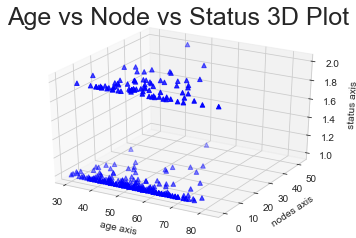

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(haberman['age'],haberman['nodes'],haberman['status'],c='b',marker='^')

ax.set_xlabel('age axis')
ax.set_ylabel('nodes axis')
ax.set_zlabel('status axis')
plt.title("Age vs Node vs Status 3D Plot",size=25);
plt.show()

Analysis:
* In the above plot we can see the density towards 0 nodes and status 1 is higher.

Conclusion:
* The dataset is imbalance in terms of statuses. 
* Most of the data points in 2 D pair plots seems to be overlaping. We cannot clearly distinguish them in two groups.
* Node vs Age graph shows more survival probability when number of positive aux. nodes present is 0 or close to 0.
* The age vs year plot shows most of datapoints lies in the range of 45 to 55 years age and all of them were treated in year 1960 to 1963.
* if number of nodes present are 0 or near , the chances of survival of patient is higher.
